In [1]:
from EMDA import EMDA, __version__
print("EMDA version is:", __version__)

from numpy import average

import matplotlib.pyplot as plt

plt.style.use('ggplot')

EMDA version is: 1.0.0a4


# Load parameters and trajectory <a class="anchor" id="load"></a>

In [2]:
parameters = 'parameters.prmtop' # AMBER parameters file
trajectory = 'trajectory.nc'     # AMBER NetCDF coordinates (10 frames)

In [19]:
emda = EMDA(parameters=parameters, trajectory=trajectory)

Trajectory has been loaded!


In [20]:
emda.load_variant(parameters, trajectory)

V2 variant has been loaded!


In [21]:
emda.load_trajectory(trajectory)
emda.load_trajectory(trajectory, variant_name='V1')
emda.load_trajectory(trajectory)

A new replica has been loaded to variant V2!
A new replica has been loaded to variant V1!
A new replica has been loaded to variant V2!


In [22]:
emda.universe

{'V1': {'R1': <Universe with 79250 atoms>, 'R2': <Universe with 79250 atoms>},
 'V2': {'R1': <Universe with 79250 atoms>,
  'R2': <Universe with 79250 atoms>,
  'R3': <Universe with 79250 atoms>}}

# Select the atoms to be used for the analysis <a class="anchor" id="select"></a>

In [23]:
emda.select('C10', 'C10', sel_type='at_name',)
emda.select('C11', 'C11', sel_type='at_name',)
emda.select('C12', 'C12', sel_type='at_name',)
emda.select('C13', 'C13', sel_type='at_name')
emda.select('C14', 'C14', sel_type='at_name',)
emda.select('H12', ['H12A', 'H12B'], sel_type='at_name')
emda.select('cof', 10597, sel_type='at_num')

emda.select('COO', [10599, 10600, 10601], sel_type='at_num')

#subs = emda.universe.select_atoms('resid 666')
emda.select('subs', 666, sel_type='res_num')

print(emda.selections)

{'C10': 'name C10', 'C11': 'name C11', 'C12': 'name C12', 'C13': 'name C13', 'C14': 'name C14', 'H12': 'name H12A or name H12B', 'cof': 'bynum 10597', 'COO': 'bynum 10599 or bynum 10600 or bynum 10601', 'subs': 'resid 666'}


# Analysis of the trajectory <a class="anchor" id="trajanalysis"></a>

In [24]:
emda.add_distance('dist_H12', 'cof', 'H12')
emda.add_angle('angle_C11C12C13', 'C11', 'C12', 'C13')
emda.add_dihedral('dihe_C10C11C13C14', 'C10', 'C11', 'C13', 'C14', domain=180)
emda.add_contacts('contacts_COO', 'COO', sel_env=5, interactions='all', include_WAT=True, measure_distances=True)
emda.add_protein_contacts('contacts_prot', sel_env=3, measure_distances=True)
#emda.add_pKa('pka', excluded_ions=['Na+'], keep_pdb=True, keep_pka=True)
emda.add_RMSD('RMSD_subs', 'subs', weights='mass')

## Run the measurements

In [25]:
print(emda.measures)

{'dist_H12': Measure dataclass with:
	Name:   dist_H12
	Type:   distance
	Sel:    ['cof', 'H12']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
		V2, R1: Not calculated
		V2, R2: Not calculated
		V2, R3: Not calculated
, 'angle_C11C12C13': Measure dataclass with:
	Name:   angle_C11C12C13
	Type:   angle
	Sel:    ['C11', 'C12', 'C13']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
		V2, R1: Not calculated
		V2, R2: Not calculated
		V2, R3: Not calculated
, 'dihe_C10C11C13C14': Measure dataclass with:
	Name:   dihe_C10C11C13C14
	Type:   dihedral
	Sel:    ['C10', 'C11', 'C13', 'C14']
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
		V2, R1: Not calculated
		V2, R2: Not calculated
		V2, R3: Not calculated
, 'contacts_COO': Measure dataclass with:
	Name:   contacts_COO
	Type:   contacts
	Sel:    ['COO', 5]
	Status: 
		V1, R1: Not calculated
		V1, R2: Not calculated
		V2, R1: Not calculated
		V2, R2: Not calculated
		V2, R3: Not calculated
, 'contacts_pro

In [26]:
emda.run()

Variants:   0%|          | 0/2 [00:00<?, ?var/s]

Measuring variant V1, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V1, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R3:   0%|          | 0/10 [00:00<?, ?Frame/s]

emda.measures['dist_H12'].result

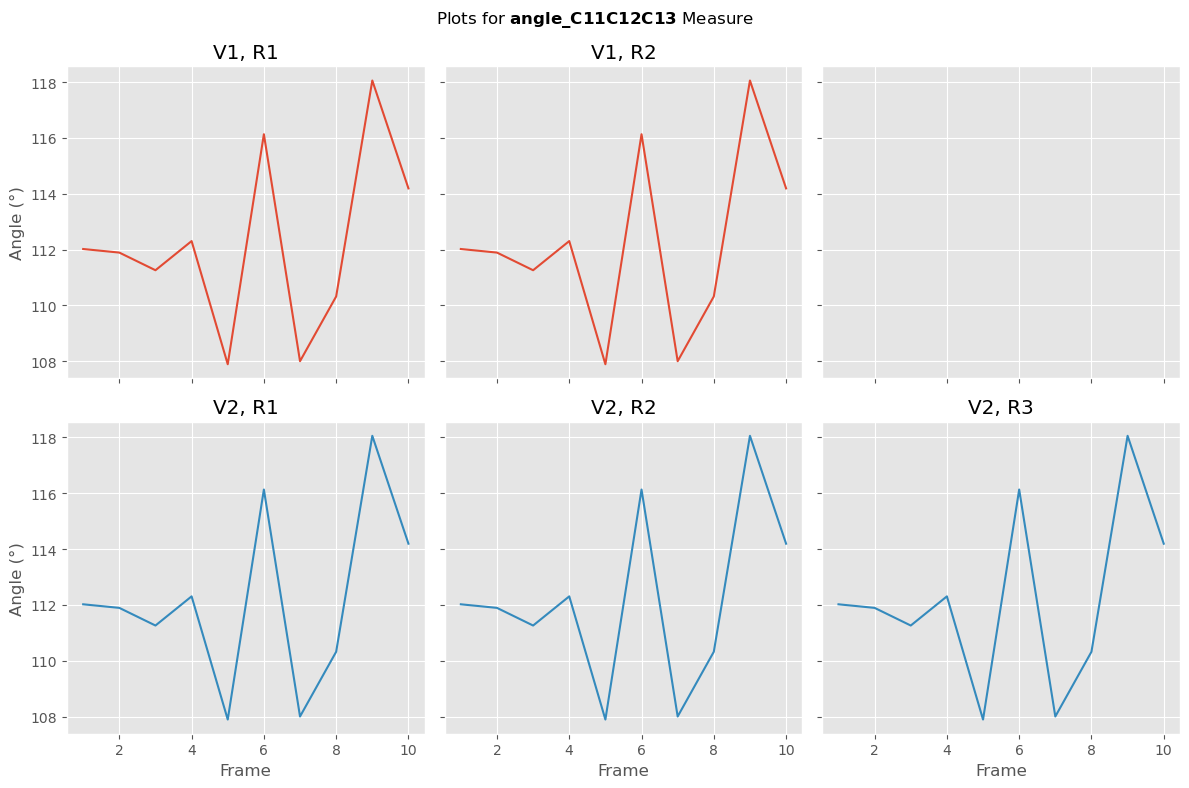

In [27]:
emda.plot_measure(measure_name='angle_C11C12C13', combine_replicas=False, width_per_replica=4)

## Analyse distances, angles and dihedrals

In [28]:
emda.analyse_value('dist_H12_bool', 'dist_H12', 5)
emda.analyse_value('dihe_C10C11C13C14_bool', 'dihe_C10C11C13C14', 0, 20, mode='tol')

In [29]:
emda.analyse_NACs('dist_dihe_NACs', ['dist_H12_bool', 'dihe_C10C11C13C14_bool'], invert=False)


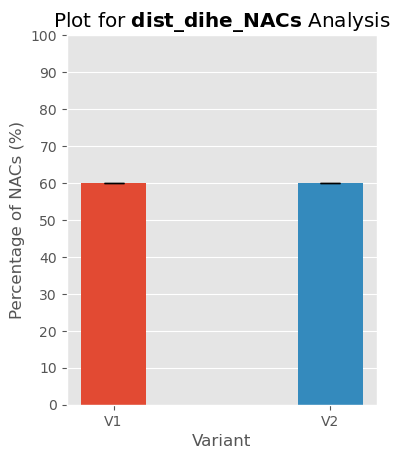

In [30]:
emda.plot_NACs('dist_dihe_NACs', merge_replicas=True, percentage=True, bar_width=0.1, width=4)

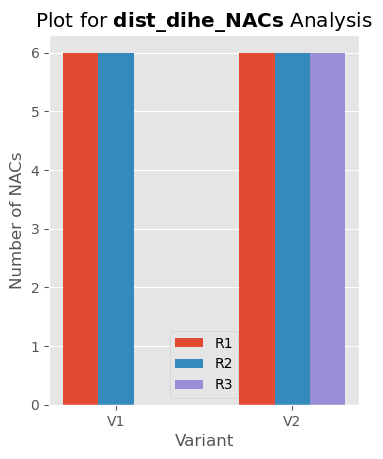

In [31]:
emda.plot_NACs('dist_dihe_NACs', merge_replicas=False, percentage=False, bar_width=0.2)

## Analyse contacts

In [32]:
emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO', percentage=True)

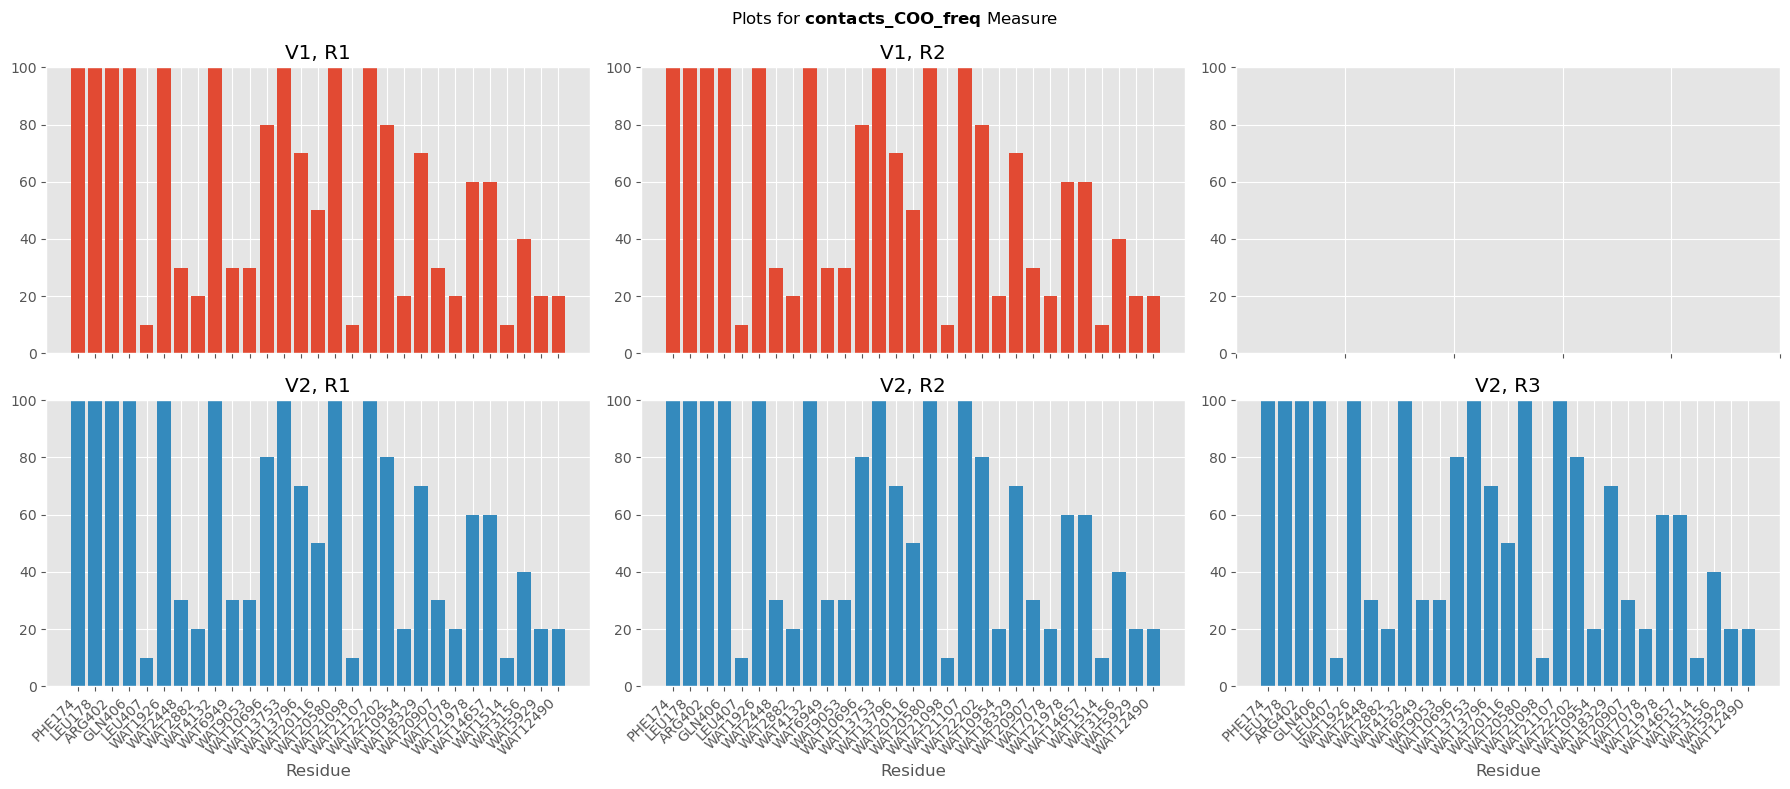

In [33]:
# plotting from plotter
emda.plot_contacts_frequency('contacts_COO_freq', width_per_replica=6, same_x=False, same_y=False, merge_replicas=False, bar_width=0.8)

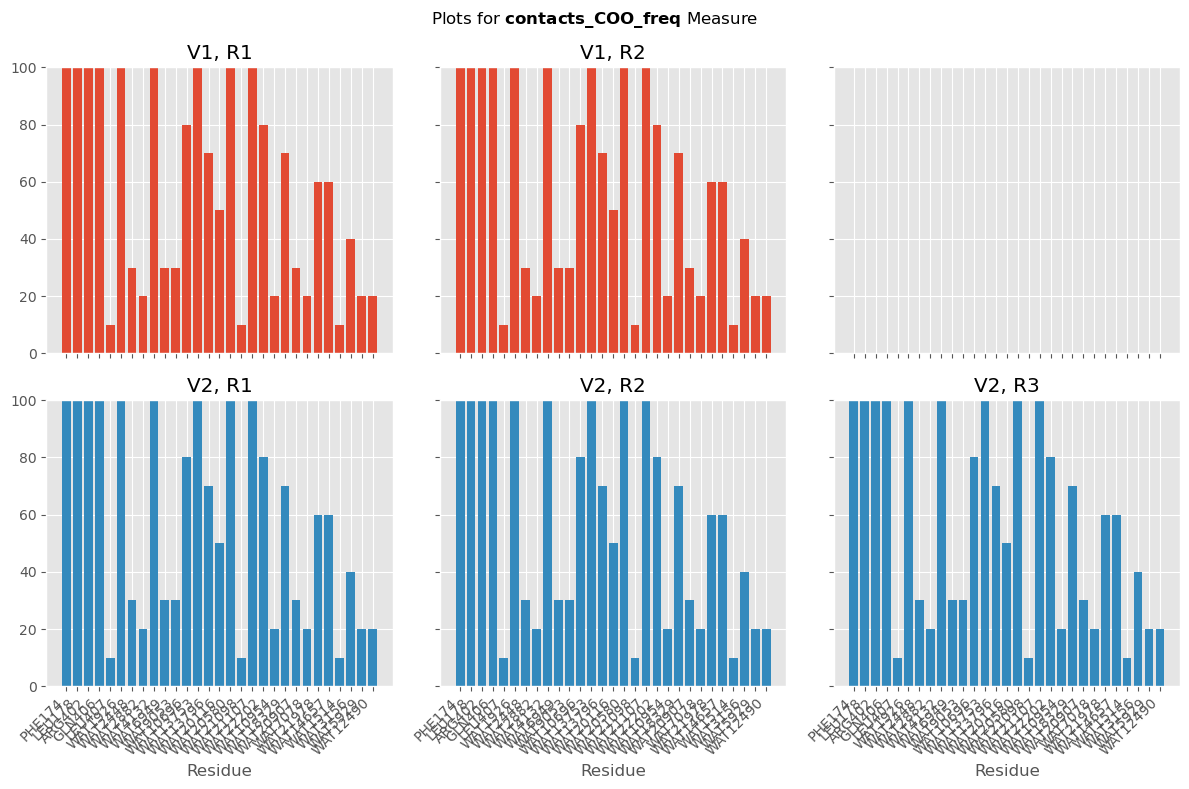

In [36]:
# plotting from Analysis' plot method
emda.analyses['contacts_COO_freq'].plot()

In [39]:
emda.analyse_contacts_amount('contacts_COO_amount', 'contacts_COO')

In [43]:
emda.analyses['contacts_COO_amount'].options

{'mode': 'contacts'}

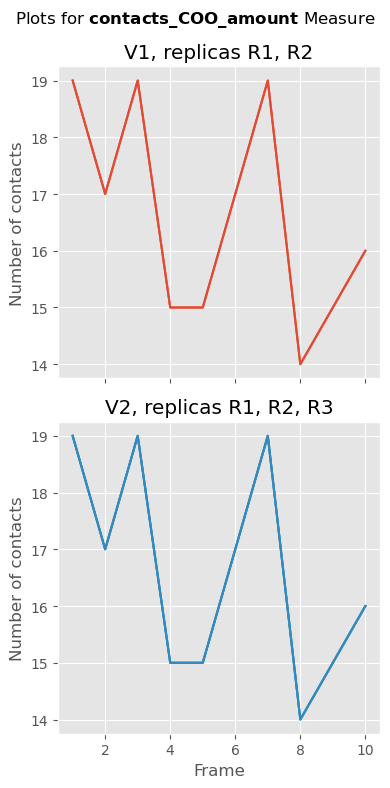

In [41]:
emda.analyses['contacts_COO_amount'].plot(merge_replicas=True)

In [38]:
# The Analysis' plot method nor the plot_measure plotter are compatible yet
emda.analyses['contacts_prot_amount'].plot()

NotCompatibleAnalysisForPlotterError: The input analysis is not compatible with the chosen plotter.